In [1]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt

In [2]:
# to open file
with open(f'saves/lake_data_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [8]:
# lake id for lake to plot
def plot_wlts(lake_id, data, save=False):
    lake_name = data[lake_id]['name']
    wlts_list = data[lake_id]['wlts']

    fig, ax = plt.subplots(1, 1,figsize=(10, 6))
    for i, df in enumerate(wlts_list):
        sat = data[lake_id]['sats'][i]
        track = data[lake_id]['tracks'][i]
        ax.plot(df.time, df.wl, ".-",linewidth=1, label=f"{sat} {track}")
    ax.set_title(f"Lake ID: {lake_id}", fontsize=16)
    #ax.set_title(f"Lake name: {lake_name}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Water level (m)")
    ax.grid(True)
    fig.legend(ncol=7, loc='lower center')
    fig.subplots_adjust(bottom =0.15)
    if save:
        plt.savefig(f"plots/wlts_id{lake_id}.png", 
                bbox_inches='tight', facecolor ="w", dpi=300)
    plt.show()

### Lake with the most timeseries

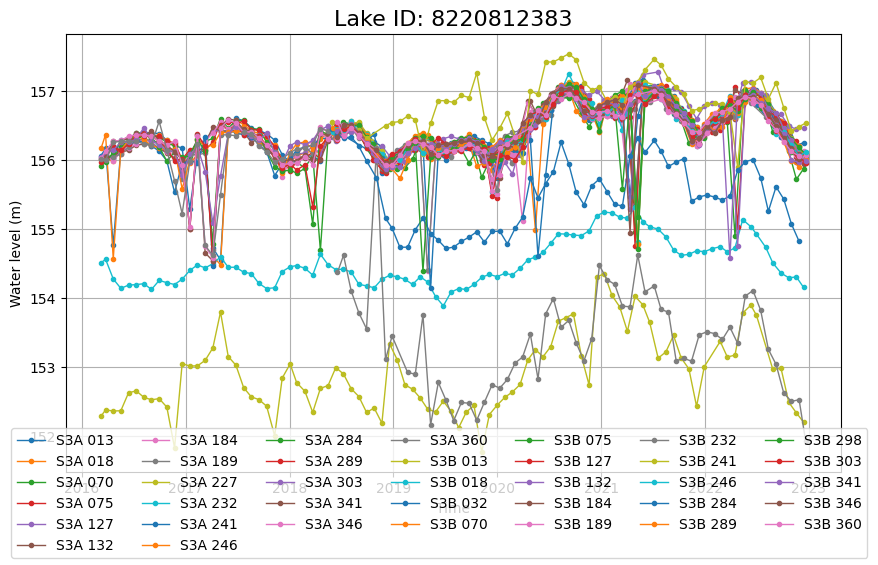

In [9]:
wlts_count = [len(data[lake]['wlts']) for lake in data.keys()]
lakes = list(data.keys())
lake_id = lakes[np.argmax(wlts_count)]

plot_wlts(lake_id, data, save=True)

### Large Aral

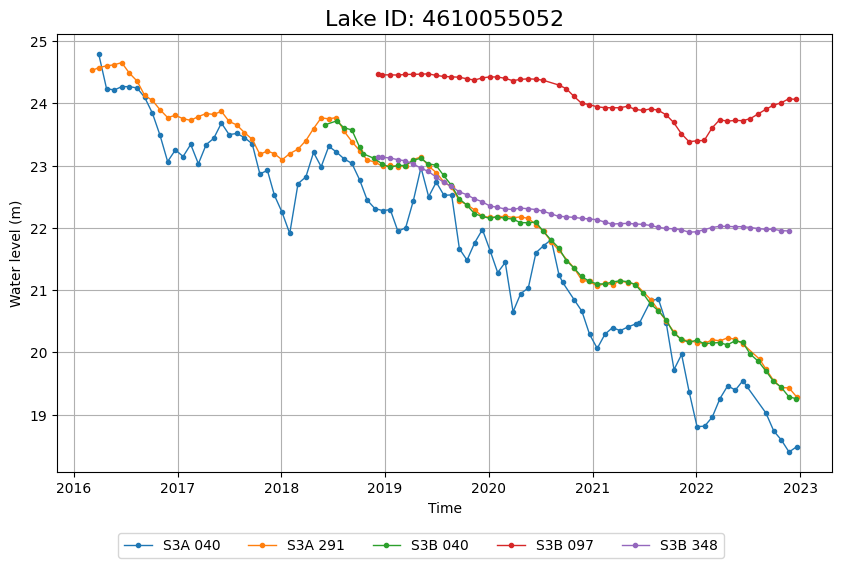

In [10]:
lake_id = 4610055052
plot_wlts(lake_id, data, save=True)

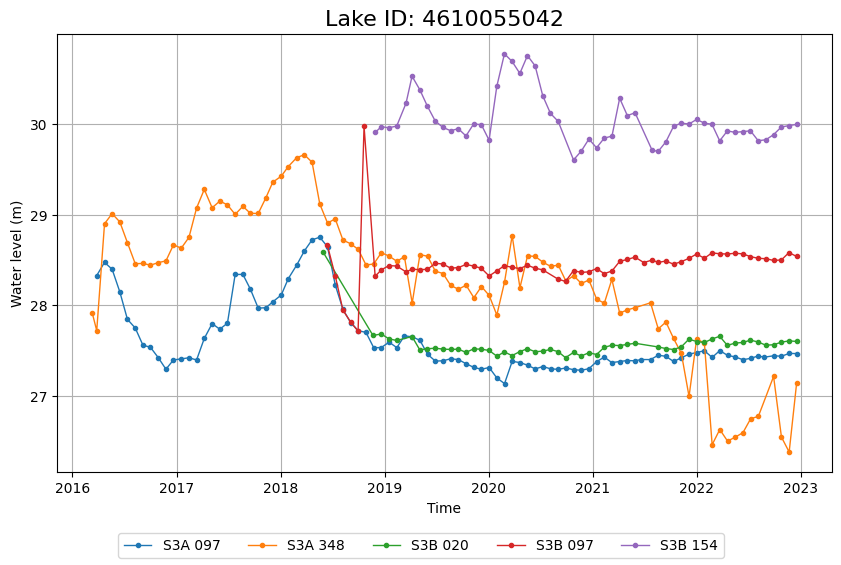

In [11]:
lake_id = 4610055042
plot_wlts(lake_id, data, save=True)

### Väneren

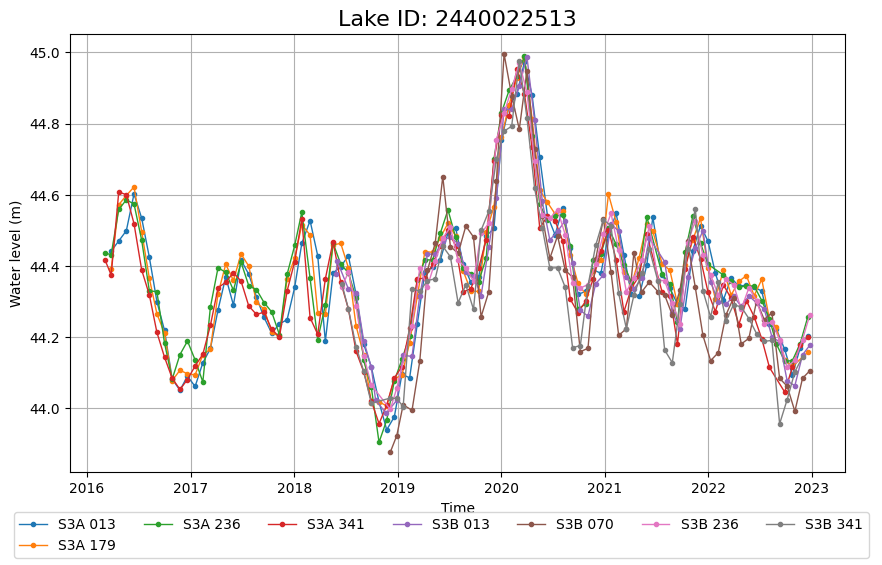

In [12]:
# Vänern 
lake_id = 2440022513
plot_wlts(lake_id, data, save=True)

## Data scale/variability

In [8]:
# Get all wlts values
wltss = {'conv':{'all_wltsv':[],'all_wlts':[], 'all_wlts_lakes':[], 'all_wltsv_t': [], 'wlts_std': [], 'lakes': []},
        'all':{'all_wltsv':[],'all_wlts':[], 'all_wlts_lakes':[], 'all_wltsv_t': [], 'wlts_std': [], 'lakes': []},
        'nn':{'all_wltsv':[],'all_wlts':[], 'all_wlts_lakes':[], 'all_wltsv_t': [], 'wlts_std': [], 'lakes': []}}

for lake in data.keys():
    for i, df in enumerate(data[lake]['wlts']):
        wl  =list(df.wl)
        wltss['all']['all_wltsv'].extend(wl)
        wltss['all']['all_wlts'].append(wl)
        wltss['all']['wlts_std'].append(np.std(wl))
        wltss['all']['all_wlts_lakes'].append(lake)
        wltss['all']['all_wltsv_t'].extend(list(df.time))
        if lake not in wltss['all']['lakes']:
            wltss['all']['lakes'].append(lake)
        
        if data[lake]['conv'][i].conv[0]==0:
            wltss['conv']['all_wltsv'].extend(wl)
            wltss['conv']['all_wlts'].append(wl)
            wltss['conv']['wlts_std'].append(np.std(wl))
            wltss['conv']['all_wlts_lakes'].append(lake)
            wltss['conv']['all_wltsv_t'].extend(list(df.time))
            if lake not in wltss['conv']['lakes']:
                wltss['conv']['lakes'].append(lake)
        
        if np.all(np.asarray(wl) >=0):
            wltss['nn']['all_wltsv'].extend(wl)
            wltss['nn']['all_wlts'].append(wl)
            wltss['nn']['wlts_std'].append(np.std(wl))
            wltss['nn']['all_wlts_lakes'].append(lake)
            wltss['nn']['all_wltsv_t'].extend(list(df.time))
            if lake not in wltss['nn']['lakes']:
                wltss['nn']['lakes'].append(lake)

In [15]:
# for all data
print(len(wltss['all']['all_wltsv']))
print(len(wltss['all']['all_wlts']))
print(len(wltss['all']['lakes']))
print(np.mean(wltss['all']['all_wltsv']))
print(np.median(wltss['all']['all_wltsv']))
print(np.std(wltss['all']['all_wltsv']))
print(np.min(wltss['all']['all_wltsv']))
print(np.max(wltss['all']['all_wltsv']))
print('wlts std')

print(np.mean(wltss['all']['wlts_std']))
print(np.median(wltss['all']['wlts_std']))
print(np.std(wltss['all']['wlts_std']))
print(np.min(wltss['all']['wlts_std']))
print(np.max(wltss['all']['wlts_std']))

647024
9558
5032
390.73748447583097
215.27351903658598
760.2105939309744
-438.885186952833
5385.61279716714
wlts std
6.540306798399664
0.5167371545617505
25.097456094322958
0.0
498.2625312797255


In [16]:
# for converged data
print(len(wltss['conv']['all_wltsv']))
print(len(wltss['conv']['all_wlts']))
print(len(wltss['conv']['lakes']))
print(np.mean(wltss['conv']['all_wltsv']))
print(np.median(wltss['conv']['all_wltsv']))
print(np.std(wltss['conv']['all_wltsv']))
print(np.min(wltss['conv']['all_wltsv']))
print(np.max(wltss['conv']['all_wltsv']))
print('wlts std')

print(np.mean(wltss['conv']['wlts_std']))
print(np.median(wltss['conv']['wlts_std']))
print(np.std(wltss['conv']['wlts_std']))
print(np.min(wltss['conv']['wlts_std']))
print(np.max(wltss['conv']['wlts_std']))

616732
9098
4880
393.0257037801247
213.4109051124135
769.6596677832438
-438.885186952833
5385.61279716714
wlts std
6.152411836438023
0.5114492695552582
24.225343313780115
5.803461119093383e-11
498.2625312797255


In [17]:
# for non-negative data
print(len(wltss['nn']['all_wltsv']))
print(len(wltss['nn']['all_wlts']))
print(len(wltss['nn']['lakes']))
print(np.mean(wltss['nn']['all_wltsv']))
print(np.median(wltss['nn']['all_wltsv']))
print(np.std(wltss['nn']['all_wltsv']))
print(np.min(wltss['nn']['all_wltsv']))
print(np.max(wltss['nn']['all_wltsv']))
print('wlts std')

print(np.mean(wltss['nn']['wlts_std']))
print(np.median(wltss['nn']['wlts_std']))
print(np.std(wltss['nn']['wlts_std']))
print(np.min(wltss['nn']['wlts_std']))
print(np.max(wltss['nn']['wlts_std']))

615791
9101
4795
410.0460999693287
234.96890132595
774.1280913974646
0.0021758862835127
5385.61279716714
wlts std
6.18897775972889
0.5218841266606536
23.64463386522545
0.0
498.2625312797255


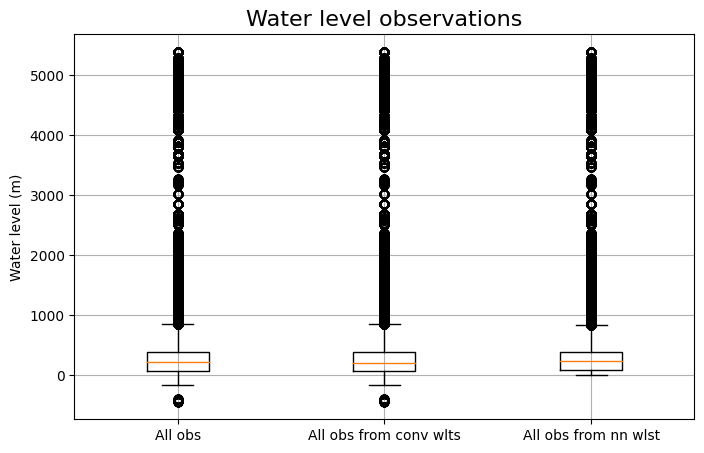

In [50]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
box_data = [wltss['all']['all_wltsv'], wltss['conv']['all_wltsv'], wltss['nn']['all_wltsv']]#, wlts_std_max, wlts_std_max_c]
box_labels = ['All obs', 'All obs from conv wlts', 'All obs from nn wlst'] #, 'wlts with highest std', 'conv wlts with highest std']
ax.boxplot(box_data, labels=box_labels)
ax.grid(True)
ax.set_title("Water level observations", fontsize=16)
#ax.set_xlabel("Number of time series")
ax.set_ylabel("Water level (m)")
#ax.set_yscale('log')
plt.savefig(f"plots/box_wlts_all.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

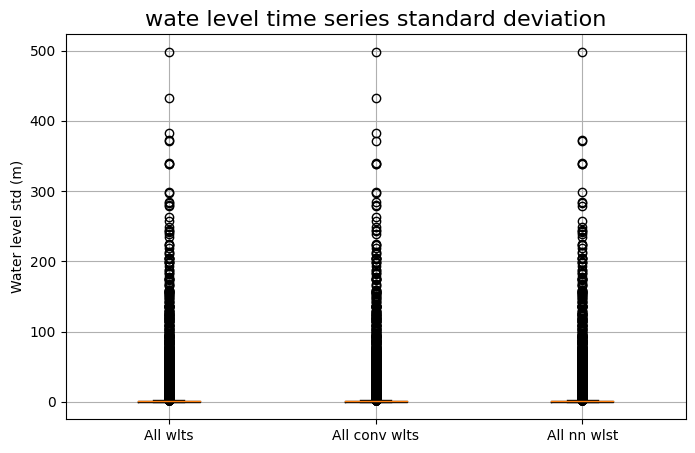

In [52]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
box_data = [wltss['all']['wlts_std'], wltss['conv']['wlts_std'], wltss['nn']['wlts_std']]
box_labels = ['All wlts', 'All conv wlts', 'All nn wlst'] 
ax.boxplot(box_data, labels=box_labels)
ax.grid(True)
ax.set_title("wate level time series standard deviation", fontsize=16)
#ax.set_xlabel("Number of time series")
ax.set_ylabel("Water level std (m)")
#ax.set_yscale('log')
plt.savefig(f"plots/box_wlts_all_std.png", 
            bbox_inches='tight', facecolor ="w", dpi=200)
plt.show()

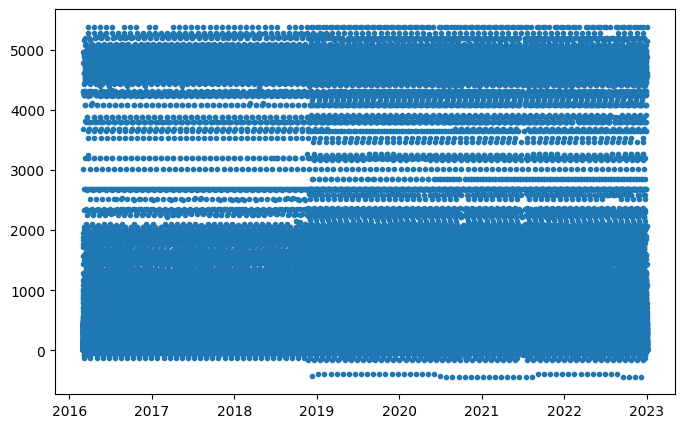

In [31]:
y = wltss['all']['all_wltsv']
x = np.asarray(wltss['all']['all_wltsv_t'])

fig, ax = plt.subplots(1, 1,figsize=(8, 5))

ax.plot(x,y,'.')
plt.show()

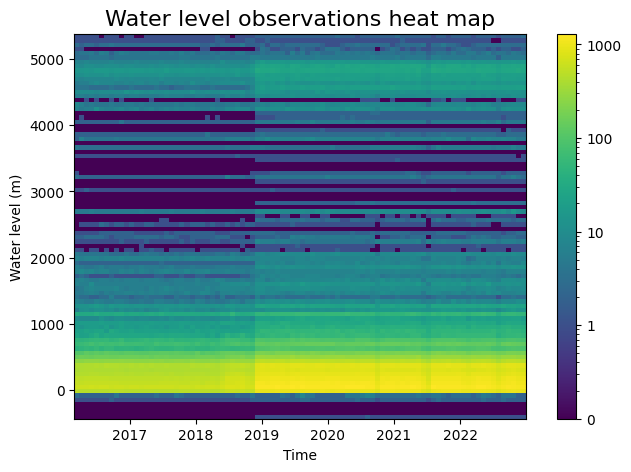

In [36]:
from matplotlib.colors import LogNorm
y = wltss['all']['all_wltsv']
x = 1000*np.asarray(wltss['all']['all_wltsv_t'])

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[90,90])
heatmap[heatmap==0] = 0.1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots(1, 1,figsize=(8, 5))
im = ax.imshow(heatmap.T, extent=extent, origin='lower',cmap='viridis',norm=LogNorm())
ax.set_xlabel('Time')
ax.set_ylabel('Water level (m)')
ax.set_title("Water level observations heat map", fontsize=16)
ax.set_xticks([2017000, 2018000, 2019000, 2020000, 2021000, 2022000])
ax.set_xticklabels([2017, 2018, 2019, 2020, 2021, 2022])
cbar = plt.colorbar(im,ticks=[0.1, 1, 10,100,1000])
cbar.ax.set_yticklabels(['0', '1', '10', '100','1000'])
plt.savefig(f"plots/heat_wlts.png", bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()

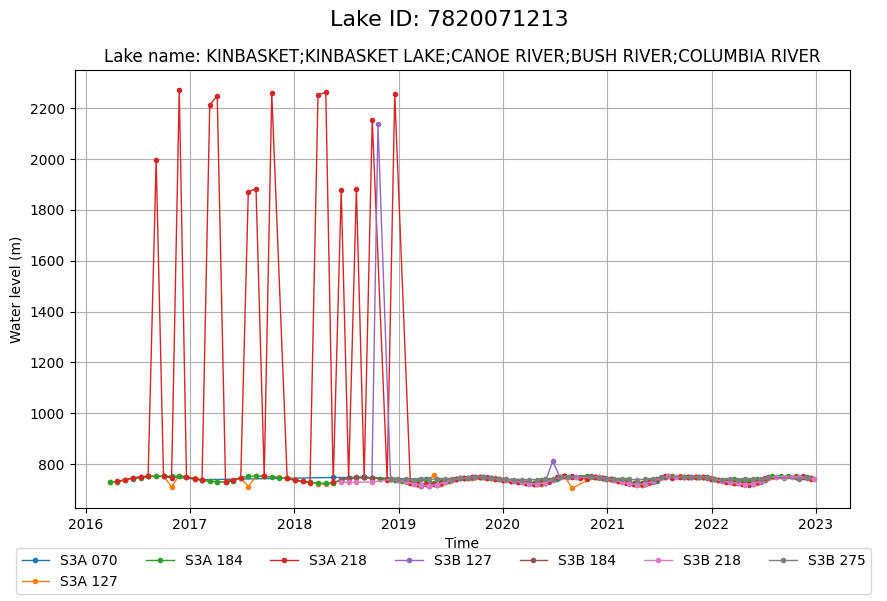

In [15]:
# plot the lake with the highest std

wlts_std = [np.std(wlts) for wlts in wltss['all']['all_wlts']]
wlts_std_c = [np.std(wlts) for wlts in wltss['conv']['all_wlts']]

lake_id = wltss['all']['all_wlts_lakes'][np.argmax(wlts_std)]
lake_id_c = wltss['conv']['all_wlts_lakes'][np.argmax(wlts_std_c)]

plot_wlts(lake_id_c, data, save=True)

In [16]:
def plot_wlts_multi(lake_id, data, save=False, multiple=False):
    if multiple == False:
        lake_id = [lake_id]
    
    fig, ax = plt.subplots(1, 1,figsize=(10, 6))
    
    for lake in lake_id:
        lake_name = data[lake]['name']
        wlts_list = data[lake]['wlts']


        for i, df in enumerate(wlts_list):
            sat = data[lake]['sats'][i]
            track = data[lake]['tracks'][i]
            ax.plot(df.time, df.wl, ".-",linewidth=1, label=f"{lake} {sat} {track}")
    #ax.set_title(f"Lake ID: {lake} \n Lake name: {lake_name}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Water level (m)")
    ax.grid(True)
    fig.legend()
    if save:
        plt.savefig(f"plots/wlts_ids{len(lake_id)}.png", 
                bbox_inches='tight', facecolor ="w", dpi=300)
    plt.show()

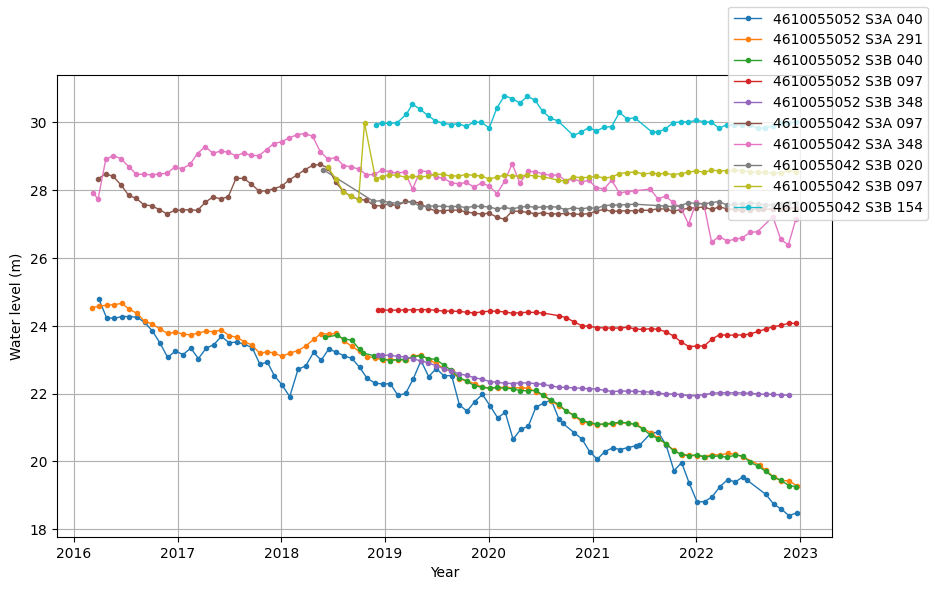

In [17]:
lakes = list(data.keys())

#plot_wlts(lakes[:100], data, save=False, multiple=True)
plot_wlts_multi([4610055052, 4610055042], data, save=False, multiple=True)